In [185]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import os.path

In [2]:
#read the dataset and check the first five rows
df = pd.read_csv("EDA_nas.csv")
df.describe()

,STUID,District,Category,Same.language,Maths..,Reading..,Science..,Social..
count,8.801000e+03,8801.000000,8232.000000,8572.000000,4190.000000,4227.000000,4144.000000,4119.000000
mean,2.608389e+10,8.255766,2.787293,1.102776,31.601532,55.404436,36.313272,40.502527
std,4.069188e+07,4.065476,1.146670,0.303684,14.734404,23.279043,13.199105,14.479584
min,2.601100e+10,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.604207e+10,4.000000,2.000000,1.000000,22.030000,35.575000,27.270000,30.610000
50%,2.609115e+10,9.000000,3.000000,1.000000,28.070000,56.670000,34.550000,38.780000
75%,2.612121e+10,12.000000,4.000000,1.000000,36.840000,73.330000,43.640000,51.020000
max,2.614127e+10,14.000000,4.000000,2.000000,94.740000,100.000000,85.450000,89.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STUID                   8801 non-null   int64  
 1   State                   8801 non-null   object 
 2   District                8801 non-null   int64  
 3   Gender                  8799 non-null   object 
 4   Age                     8569 non-null   object 
 5   Category                8232 non-null   float64
 6   Same.language           8572 non-null   float64
 7   Siblings                8801 non-null   object 
 8   Handicap                8304 non-null   object 
 9   Father.edu              8147 non-null   object 
 10  Mother.edu              7950 non-null   object 
 11  Father.occupation       7761 non-null   object 
 12  Mother.occupation       6626 non-null   object 
 13  Below.poverty           7347 non-null   object 
 14  Use.calculator          6646 non-null   

In [6]:
df["Watch.TV"]

0         Every day
1       Once a week
2         Every day
3         Every day
4             Never
           ...     
8796      Every day
8797      Every day
8798      Every day
8799    Once a week
8800    Once a week
Name: Watch.TV, Length: 8801, dtype: object

In [8]:
df1 = pd.pivot_table(df,index=["Watch.TV"],values=['Science..'], aggfunc=np.mean)
df1

,Science..
Watch.TV,
Every day,36.357915
Never,35.638589
Once a month,36.786127
Once a week,36.467112


In [9]:
df1 = pd.pivot_table(df,index=["Father.edu"],values=['Maths..'], aggfunc=np.mean)
df1

,Maths..
Father.edu,
Degree & above,34.879193
Illiterate,29.126754
Primary,32.561137
Secondary,32.230393
Sr secondary,32.493415


In [10]:
df1 = pd.pivot_table(df,index=["Father.edu"],values=['Maths..'], aggfunc=np.max)
df1

,Maths..
Father.edu,
Degree & above,77.19
Illiterate,94.74
Primary,89.83
Secondary,91.23
Sr secondary,91.53


In [12]:
df1 = pd.pivot_table(df,index=["Play.games"],values=['Reading..'], aggfunc=np.mean)
df1

,Reading..
Play.games,
Every day,54.780136
Never,49.107484
Once a month,51.951193
Once a week,59.627034


In [16]:
df1 = pd.pivot_table(df,index=["Father.edu","State"],values=['Maths..'], aggfunc=np.max)
df1

,,Maths..
Father.edu,State,
Degree & above,Maharashtra,77.19
Illiterate,Maharashtra,94.74
Primary,Maharashtra,89.83
Secondary,Maharashtra,91.23
Sr secondary,Maharashtra,91.53


In [44]:
nas_df = pd.read_csv("nas.csv")
nas_df = nas_df[["Mother.edu", 'Siblings']]
nas_df.value_counts()

Mother.edu      Siblings    
Secondary       1 sibling       1050
Illiterate      2 siblings       923
Secondary       2 siblings       846
Primary         2 siblings       771
                1 sibling        689
Illiterate      1 sibling        533
                3 siblings       532
                4+ siblings      469
Primary         3 siblings       417
Secondary       3 siblings       348
                4+ siblings      255
Primary         4+ siblings      251
Sr secondary    1 sibling        206
                2 siblings       132
Secondary       Single child      92
Primary         Single child      92
Degree & above  1 sibling         88
Illiterate      Single child      88
Sr secondary    3 siblings        48
Degree & above  2 siblings        36
Sr secondary    Single child      24
                4+ siblings       23
Degree & above  Single child      20
                3 siblings        11
                4+ siblings        6
dtype: int64

In [36]:

nas_df[(nas_df["Mother.edu"] != "") & (nas_df["Mother.edu"] == "Illiterate") & (nas_df["Siblings"] == "3 siblings")]
#nas_df1 = nas_df[nas_df["Mother.edu"] != ""]
#nas_df.value_counts()

,Mother.edu,Siblings
1,Illiterate,3 siblings
2,Illiterate,3 siblings
14,Illiterate,3 siblings
18,Illiterate,3 siblings
21,Illiterate,3 siblings
...,...,...
8647,Illiterate,3 siblings
8665,Illiterate,3 siblings
8668,Illiterate,3 siblings
8712,Illiterate,3 siblings


In [39]:
nas_df[(nas_df["Mother.edu"] != "") & (nas_df["Mother.edu"] == "Illiterate") & (nas_df["Siblings"] == "3 sibling")]


,Mother.edu,Siblings


In [37]:
nas_df[(nas_df["Mother.edu"] != "") & (nas_df["Mother.edu"] == "Illiterate") & (nas_df["Siblings"] == "2 siblings")]


,Mother.edu,Siblings
4,Illiterate,2 siblings
5,Illiterate,2 siblings
8,Illiterate,2 siblings
15,Illiterate,2 siblings
33,Illiterate,2 siblings
...,...,...
8709,Illiterate,2 siblings
8717,Illiterate,2 siblings
8729,Illiterate,2 siblings
8778,Illiterate,2 siblings


In [38]:
nas_df[(nas_df["Mother.edu"] != "") & (nas_df["Mother.edu"] == "Illiterate") & (nas_df["Siblings"] == "2 sibling")]


,Mother.edu,Siblings


In [41]:
nas_df[(nas_df["Mother.edu"] != "") & (nas_df["Mother.edu"] == "Illiterate") & (nas_df["Siblings"] == "4+ siblings")]


,Mother.edu,Siblings
7,Illiterate,4+ siblings
9,Illiterate,4+ siblings
11,Illiterate,4+ siblings
17,Illiterate,4+ siblings
52,Illiterate,4+ siblings
...,...,...
8674,Illiterate,4+ siblings
8675,Illiterate,4+ siblings
8683,Illiterate,4+ siblings
8707,Illiterate,4+ siblings


In [42]:
nas_df[(nas_df["Mother.edu"] != "") & (nas_df["Mother.edu"] == "Illiterate") & (nas_df["Siblings"] == "4+ sibling")]


,Mother.edu,Siblings


In [45]:
nas_df_1 = pd.read_csv("nas.csv")
nas_df_1 = nas_df_1[["Father.edu", 'Science..', "Age"]]
nas_df_1.value_counts()

Father.edu    Science..  Age      
Secondary     34.55      14 years     56
Illiterate    29.09      14 years     44
Primary       34.55      14 years     43
Illiterate    30.91      14 years     42
Primary       27.27      14 years     40
                                      ..
              65.45      12 years      1
                         15 years      1
              67.27      15 years      1
              69.09      11- years     1
Sr secondary  76.36      14 years      1
Length: 585, dtype: int64

In [65]:
nas_df_1[nas_df_1["Age"] > "12 years"]

,Father.edu,Science..,Age
0,Illiterate,NaN,13 years
1,NaN,NaN,15 years
2,Degree & above,NaN,14 years
3,Secondary,NaN,13 years
4,Primary,27.27,14 years
...,...,...,...
8796,Secondary,34.55,13 years
8797,NaN,NaN,13 years
8798,Sr secondary,NaN,14 years
8799,Sr secondary,23.64,13 years


In [72]:
nas_df_1[(nas_df_1["Father.edu"] == "Degree & above") & (nas_df_1["Age"] > "12 years") & (nas_df_1["Age"] < "15 years") & (nas_df_1["Science.."] > 30)].value_counts()



Father.edu      Science..  Age     
Degree & above  50.91      13 years    7
                40.00      14 years    6
                38.18      13 years    5
                52.73      14 years    5
                47.27      13 years    5
                32.73      14 years    5
                43.64      13 years    4
                54.55      14 years    4
                34.55      13 years    4
                49.09      14 years    4
                36.36      13 years    4
                47.27      14 years    4
                69.09      13 years    3
                45.45      14 years    3
                34.55      14 years    3
                41.82      14 years    3
                           13 years    3
                36.36      14 years    3
                67.27      14 years    2
                32.73      13 years    2
                56.36      13 years    2
                60.00      13 years    2
                           14 years    2
                54.55

In [71]:
nas_df_1[(nas_df_1["Father.edu"] == "Degree & above") & (nas_df_1["Age"] >"14 years")].value_counts()


Father.edu      Science..  Age      
Degree & above  29.09      15 years     1
                32.73      16+ years    1
dtype: int64

In [73]:
nas_df_1[(nas_df_1["Father.edu"] == "Degree & above") & (nas_df_1["Age"] > "12 years") & (nas_df_1["Age"] < "14 years") & (nas_df_1["Science.."] > 30)].value_counts()


Father.edu      Science..  Age     
Degree & above  50.91      13 years    7
                38.18      13 years    5
                47.27      13 years    5
                36.36      13 years    4
                34.55      13 years    4
                43.64      13 years    4
                41.82      13 years    3
                69.09      13 years    3
                40.00      13 years    2
                45.45      13 years    2
                63.64      13 years    2
                49.09      13 years    2
                32.73      13 years    2
                72.73      13 years    2
                54.55      13 years    2
                56.36      13 years    2
                60.00      13 years    2
                67.27      13 years    1
                30.91      13 years    1
                61.82      13 years    1
                58.18      13 years    1
                52.73      13 years    1
                74.55      13 years    1
dtype: int64

In [123]:
#Extract all the relevant metrics (such as the date, day, month, year, hour, and minutes) 
#of each person’s submission and attempt the following questions.   
grades_df = pd.read_csv("grades.csv")
grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   submission   198 non-null    object
 1   submit_time  198 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [89]:
#grades_df["date"] = grades_df["submit_time"].apply(lambda x: x[0:8])
#grades_df["time"] = grades_df["submit_time"].apply(lambda x: x[9:])
#grades_df["hours"] = grades_df["time"].apply(lambda x: x[0:2])
#grades_df["Minutes"] = grades_df["time"].apply(lambda x: x[3:5])

In [156]:
grades_df['submit_time'] = pd.to_datetime(grades_df['submit_time'])

grades_df['day'] = grades_df['submit_time'].dt.day
grades_df["month"] = grades_df["submit_time"].dt.month
grades_df["year"] = grades_df["submit_time"].dt.year
grades_df["time"] = grades_df["submit_time"].dt.time
grades_df["hours"] = grades_df["submit_time"].dt.hour
grades_df["Minutes"] = grades_df["submit_time"].dt.minute
grades_df["Seconds"] = grades_df["submit_time"].dt.second

In [ ]:
grades_df['file_extension'] = grades_df['submission'].apply(lambda x : os.path.splitext(x)[1])

In [157]:
grades_df.head()

,submission,submit_time,file_extension,day,month,time,hours,Minutes,year,Seconds
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,2017-01-03 20:28:52,.zip,3,1,20:28:52,20,28,2017,52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,2017-01-03 20:18:21,.zip,3,1,20:18:21,20,18,2017,21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,2017-01-03 22:37:08,.zip,3,1,22:37:08,22,37,2017,8
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,2017-01-02 21:43:19,.zip,2,1,21:43:19,21,43,2017,19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,2017-01-03 15:27:49,.zip,3,1,15:27:49,15,27,2017,49


In [145]:
# You can use the “str_count()” function(This function is present in R language) 
#from the string library, which would return 1 if the submission columns contain “.zip” text.

In [149]:
grades_df.groupby(grades_df['file_extension']).file_extension.value_counts()

file_extension  file_extension
.7z             .7z                 2
.R              .R                  7
.zip            .zip              189
Name: file_extension, dtype: int64

In [150]:
189/198*100 

95.45454545454545

In [151]:
#This was the Association Rule Mining assignment whose submission deadline was Jan 3, 2017 - 11:59:59 PM. 
#The second deadline was Jan 9, 2017 - 11:59 PM.


In [166]:
grades_df[(grades_df.day >3) & (grades_df.month >=1) & (grades_df.year >=2017)].file_extension.value_counts()

.zip    39
.R       4
Name: file_extension, dtype: int64

In [175]:
grades_df['After_fsd'] = ((grades_df.day >3) & (grades_df.month >=1) & (grades_df.year >=2017)).apply(lambda x : 1 if x==True else 0)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [169]:
grades_df.head()

,submission,submit_time,file_extension,day,month,time,hours,Minutes,year,Seconds,After_fsd
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,2017-01-03 20:28:52,.zip,3,1,20:28:52,20,28,2017,52,0
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,2017-01-03 20:18:21,.zip,3,1,20:18:21,20,18,2017,21,0
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,2017-01-03 22:37:08,.zip,3,1,22:37:08,22,37,2017,8,0
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,2017-01-02 21:43:19,.zip,2,1,21:43:19,21,43,2017,19,0
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,2017-01-03 15:27:49,.zip,3,1,15:27:49,15,27,2017,49,0


In [171]:
grades_df[grades_df['After_fsd'] == 1].count()

submission        43
submit_time       43
file_extension    43
day               43
month             43
time              43
hours             43
Minutes           43
year              43
Seconds           43
After_fsd         43
dtype: int64

In [179]:
grades_df[grades_df['hours']].value_counts

KeyError: "None of [Int64Index([20, 20, 22, 21, 15,  2, 23, 23, 14, 21,\n            ...\n             9, 22, 21, 23, 22, 22, 23, 21, 23, 22],\n           dtype='int64', length=198)] are in the [columns]"

In [183]:
grades_df.submission.groupby(grades_df["hours"]).plot()


hours
0     10
1      8
2      2
3      3
4      2
6      1
8      1
9      1
10     3
11     1
12     3
13     6
14     6
15     4
16     2
17     4
18     6
19     2
20    16
21    27
22    24
23    66
Name: submission, dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours'>

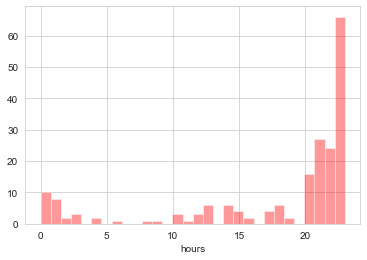

In [186]:
sns.set_style('whitegrid')
sns.distplot(grades_df['hours'], kde = False, color ='red', bins = 30)